In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# define some reusable stuff
figsize = (14, 5)

# Cohort analysis

In this notebook I'm trying to analyze a dataset for online retail customers. In this notebook, I will define the first purchase date (in year, month format) as the cohort. Later the percentage of returning customers per cohort will be analyzed.

### Download file

In [3]:
# define download url
url_loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

In [4]:
# put in dataframe
df = pd.read_excel(url_loc, dtype={'CustomerID': str, 'InvoiceID': str}, parse_dates = ['InvoiceDate'])

# rewrite columns with regex
df.columns = [re.sub('(?!^)([A-Z]+)', r'_\1', x).lower() for x in df.columns]

### Do some basic EDA

In [5]:
# check first rows
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
# do some EDA
df.shape

(541909, 8)

In [7]:
# check for empty values
print(pd.isnull(df).sum())

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64


In [8]:
# calculate percentage of empty values
print(pd.isnull(df).sum() / len(df))

invoice_no      0.000000
stock_code      0.000000
description     0.002683
quantity        0.000000
invoice_date    0.000000
unit_price      0.000000
customer_id     0.249267
country         0.000000
dtype: float64


In [9]:
# describe values
print(df.describe())

            quantity     unit_price
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


In [10]:
df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id             object
country                 object
dtype: object

In [11]:
# check where these negative values come from. Possibly returns?
df[df['quantity'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [12]:
# check date range in invoice_date column
print(df['invoice_date'].min())
print(df['invoice_date'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


### Some cleaning

Since the customer ID is needed for this analysis, we are dropping 135,080 rows without customer ID. Besides that, there are many rows with negative values in the quantity column. These will also be removed.

In [13]:
# dropna from column customer_id
df.dropna(subset=['customer_id'], inplace=True)

# remove returns
df = df[df['quantity'] > 0].copy()

### ...now let's get into analyzing!

In [14]:
# calculate percentage of customers with > 1 invoice_no
np.mean(df.groupby('customer_id')['invoice_no'].nunique() > 1)

# Two thirds of our customers have more than one unique invoice number and are therefore returning customers. 
# Good news!

0.6556810324959668

<AxesSubplot:>

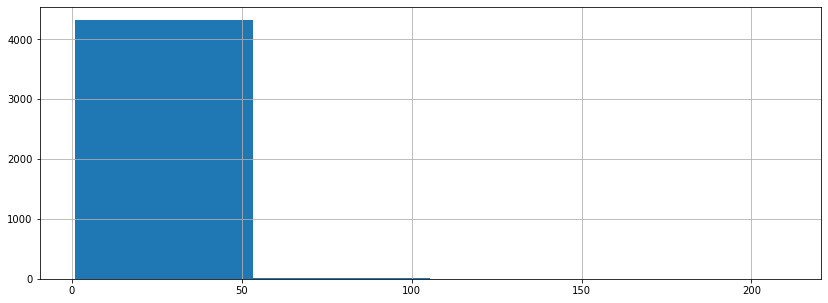

In [15]:
# plot histogram of unique invoice numbers per client
df.groupby('customer_id')['invoice_no'].nunique().hist(bins = 4, figsize = figsize)

<AxesSubplot:>

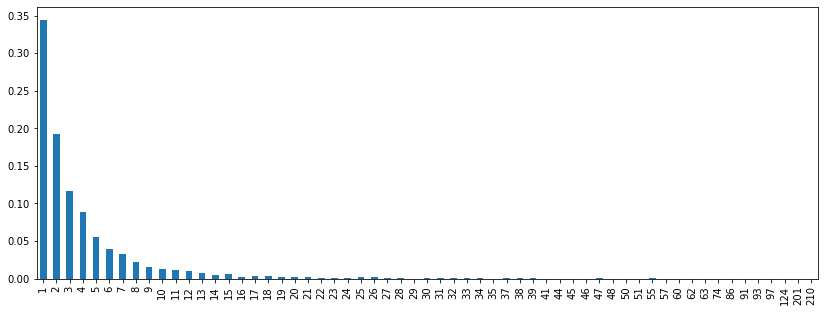

In [16]:
# calculate percentages of customers per number of unique invoice numbers
df.groupby('customer_id')['invoice_no'].nunique().value_counts(normalize = True).sort_index().plot(kind = 'bar', figsize = figsize)

In [17]:
# show data
df.groupby('customer_id')['invoice_no'].nunique().value_counts(normalize = True).sort_index()

1      0.344319
2      0.192441
3      0.117078
4      0.089191
5      0.056004
6      0.039640
7      0.032957
8      0.022586
9      0.015672
10     0.012445
11     0.011984
12     0.010371
13     0.006914
14     0.004609
15     0.006453
16     0.002535
17     0.004148
18     0.003227
19     0.002766
20     0.002766
21     0.002535
22     0.001152
23     0.001152
24     0.000691
25     0.001844
26     0.001613
27     0.000691
28     0.001383
29     0.000230
30     0.000922
31     0.000691
32     0.000691
33     0.000461
34     0.000691
35     0.000230
37     0.000691
38     0.000461
39     0.000461
41     0.000230
44     0.000230
45     0.000230
46     0.000230
47     0.000461
48     0.000230
50     0.000230
51     0.000230
55     0.000461
57     0.000230
60     0.000230
62     0.000230
63     0.000230
74     0.000230
86     0.000230
91     0.000230
93     0.000230
97     0.000230
124    0.000230
201    0.000230
210    0.000230
Name: invoice_no, dtype: float64

In [18]:
# recheck head
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [19]:
# extract periods for order month and cohort (first known order)
df['order_month'] = df['invoice_date'].dt.to_period('M')
df['cohort'] = df.groupby('customer_id')['invoice_date'].transform(min).dt.to_period('M')

In [20]:
# calculate if month of order in same cohort. If not, then it's a returning customer
df['returning_customer'] = df['order_month'] != df['cohort']

In [21]:
df.tail()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,order_month,cohort,returning_customer
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12,2011-08,True
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12,2011-08,True
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,2011-08,True
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12,2011-08,True
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12,2011-08,True


### Count customers and returning customers per cohort (overall)

<AxesSubplot:xlabel='cohort'>

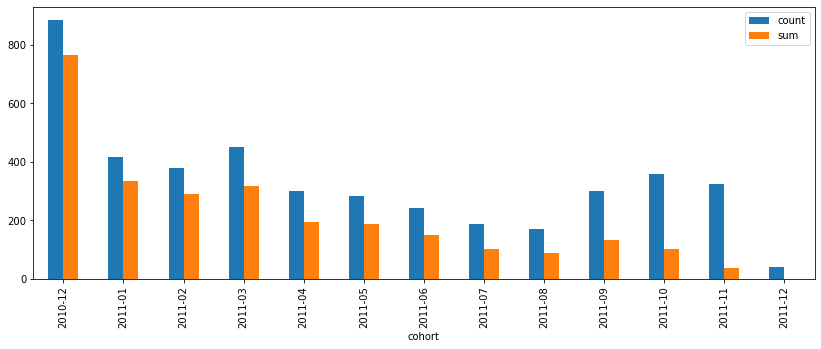

In [22]:
# plot customers and returning customers per cohort
df.groupby(['cohort', 'customer_id'])['returning_customer'].max().groupby(level = 0).agg(['count', 'sum']).plot(kind = 'bar', figsize = figsize)

<AxesSubplot:xlabel='cohort'>

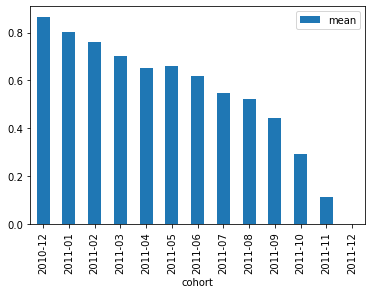

In [23]:
# calculate percentage of returning clients per cohort
df.groupby(['cohort', 'customer_id'])['returning_customer'].max().groupby(level = 0).agg(['mean']).plot(kind = 'bar')

# more than 80% of customers in cohort 2010-12 returned!

In [24]:
# show data
df.groupby(['cohort', 'customer_id'])['returning_customer'].max().groupby(level = 0).agg(['mean'])

,mean
cohort,
2010-12,0.865537
2011-01,0.803357
2011-02,0.760526
2011-03,0.703540
2011-04,0.650000
2011-05,0.661972
2011-06,0.619835
2011-07,0.547872
2011-08,0.520710


In [25]:
# group per cohort (first orderdate in YYYY-MM notation) and order_month (in YYYY-MM notation)
df_cohort = df.groupby(['cohort', 'order_month'], as_index = False).agg(n_customers = ('customer_id', 'nunique'))

# calculate periods (in months) between first order and current order per cohort/order_month
df_cohort['period_number'] = (df_cohort['order_month'] - df_cohort['cohort']).apply(lambda x: x.n)

In [26]:
df_cohort.head(25)

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,885,0
1,2010-12,2011-01,324,1
2,2010-12,2011-02,286,2
3,2010-12,2011-03,340,3
4,2010-12,2011-04,321,4
5,2010-12,2011-05,352,5
6,2010-12,2011-06,321,6
7,2010-12,2011-07,309,7
8,2010-12,2011-08,313,8
9,2010-12,2011-09,350,9


In [27]:
# create pivot from df_cohort
cohort_pivot =  df_cohort.groupby(['cohort', 'period_number'])['n_customers'].sum().unstack()

In [28]:
# define cohort size
cohort_size = cohort_pivot.iloc[:,0]

# divide n_customers by cohort_size
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [29]:
# show retention matrix
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


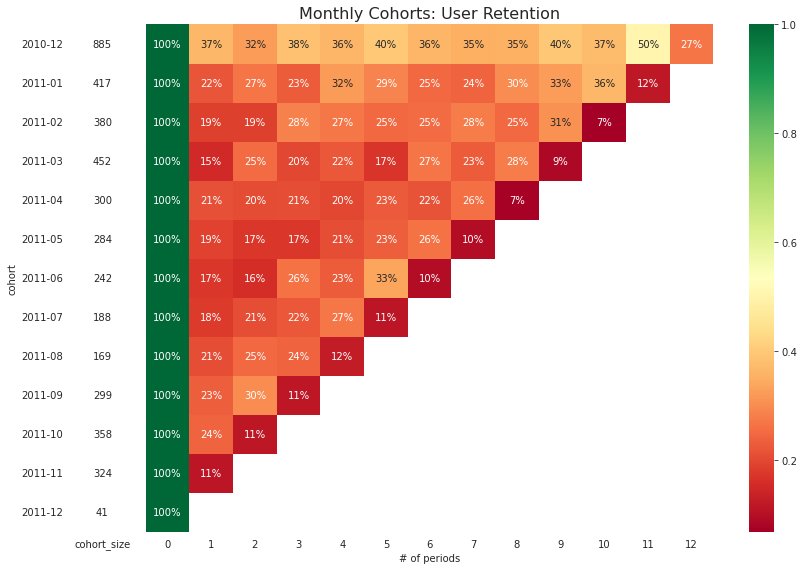

In [30]:
# create heatmap
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    #white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                ax=ax[0],
                cmap=(['white']))

    fig.tight_layout()

# Conclusion

In this analysis, conclusion can be drawn that many customers are coming back. In the first cohort, about 86% of customers returned. That is very hopeful news for the continuation of our company!